# MileStone 2: Data Collection and Description

We will explore two different set of datasets:

* GBD dataset, which will contain the measures for each mental disease per geographic area we can find
* THE OTHER DATA SET JUDY'S EXPLORING

This project aims to understand the effect of mental disorders (LIST HERE) on people's life by measure their impact with different measures, and their possible causes by exploring the living conditions of that geographical area.

We first clean the data by selecting the columns of the data set we want to read, then we will explore each dataset separately.

## The GBD Dataset

We made several queries using the GBD query tool, selecting (LIST HERE) mental disorders and all the possible measures. These queries return us (NUMBER HERE) 45 csv files.

In [576]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from enum import Enum
import numpy as np


In [92]:
data_folder = "./data/GBD_data/"
data_country_folder = "./data/GBD_data_per_country/"
saving_folder = "./data/Cleaned_GBD_data_per_country/"
file_list = [i for i in sorted(os.listdir(data_country_folder)) if 'IHME-GBD' in i]

In [90]:
pdfs = []
for file in file_list:
    print("Reading {} ...".format(file))
    pdfs.append(pd.read_csv(data_country_folder + file))

Reading IHME-GBD_2017_DATA-6298b351-1.csv ...
Reading IHME-GBD_2017_DATA-6298b351-10.csv ...
Reading IHME-GBD_2017_DATA-6298b351-11.csv ...
Reading IHME-GBD_2017_DATA-6298b351-12.csv ...
Reading IHME-GBD_2017_DATA-6298b351-13.csv ...
Reading IHME-GBD_2017_DATA-6298b351-14.csv ...
Reading IHME-GBD_2017_DATA-6298b351-15.csv ...
Reading IHME-GBD_2017_DATA-6298b351-16.csv ...
Reading IHME-GBD_2017_DATA-6298b351-17.csv ...
Reading IHME-GBD_2017_DATA-6298b351-18.csv ...
Reading IHME-GBD_2017_DATA-6298b351-19.csv ...
Reading IHME-GBD_2017_DATA-6298b351-2.csv ...
Reading IHME-GBD_2017_DATA-6298b351-20.csv ...
Reading IHME-GBD_2017_DATA-6298b351-21.csv ...
Reading IHME-GBD_2017_DATA-6298b351-22.csv ...
Reading IHME-GBD_2017_DATA-6298b351-23.csv ...
Reading IHME-GBD_2017_DATA-6298b351-24.csv ...
Reading IHME-GBD_2017_DATA-6298b351-25.csv ...
Reading IHME-GBD_2017_DATA-6298b351-26.csv ...
Reading IHME-GBD_2017_DATA-6298b351-27.csv ...
Reading IHME-GBD_2017_DATA-6298b351-28.csv ...
Reading IHME-GB

### Data Cleaning

Splitting the dataset according to different measures. Dropping the location_id, measure_id, sex_id, age_id, cause_id, metric_id columns because they are not useful.

In [91]:
pdfs[0].columns

Index(['measure', 'location', 'sex', 'age', 'cause', 'metric', 'year', 'val',
       'upper', 'lower'],
      dtype='object')

In [6]:
# cleaned_pdfs = []
# for i in range(len(pdfs)):
#     cleaned_pdfs.append(pdfs[i].drop(['location_id', 'measure_id', 'sex_id', 'age_id', 'cause_id', 'metric_id'], axis=1))

# Merge into one huge data matrix
pd_all = pd.concat(pdfs).reset_index(drop=True)
pd_all.shape

(22396332, 10)

In [7]:
pd_all.head()

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,YLLs (Years of Life Lost),Southeast Asia,Male,5 to 9,Mental disorders,Number,1990,3.834503e-01,6.954307e-01,2.309430e-01
1,YLLs (Years of Life Lost),Southeast Asia,Female,5 to 9,Mental disorders,Number,1990,2.154793e-01,5.261444e-01,1.521684e-01
2,YLLs (Years of Life Lost),Southeast Asia,Both,5 to 9,Mental disorders,Number,1990,5.989296e-01,1.056174e+00,4.024893e-01
3,YLLs (Years of Life Lost),Southeast Asia,Male,5 to 9,Mental disorders,Percent,1990,1.222975e-07,2.263333e-07,7.364287e-08
4,YLLs (Years of Life Lost),Southeast Asia,Female,5 to 9,Mental disorders,Percent,1990,9.316144e-08,2.305999e-07,6.586952e-08


In [8]:
# Get all measure names
measure_names = pd_all.measure_name.unique()
# Group by and get all groups
groups_by = pd_all.groupby('measure_name')
measure_groups = dict.fromkeys(measure_names)
for measure in measure_names:
    measure_groups[measure] = groups_by.get_group(measure)

In [12]:
# Save the groups in csv
for measure in measure_names:
    filename = saving_folder+measure+".csv"
    print("Saving {} to {}".format(measure, filename))
    measure_groups[measure].to_csv(filename, compression="zip")

Saving YLLs (Years of Life Lost) to ./data/Cleaned_GBD_data/YLLs (Years of Life Lost).csv
Saving Incidence to ./data/Cleaned_GBD_data/Incidence.csv
Saving Deaths to ./data/Cleaned_GBD_data/Deaths.csv
Saving Prevalence to ./data/Cleaned_GBD_data/Prevalence.csv
Saving YLDs (Years Lived with Disability) to ./data/Cleaned_GBD_data/YLDs (Years Lived with Disability).csv
Saving DALYs (Disability-Adjusted Life Years) to ./data/Cleaned_GBD_data/DALYs (Disability-Adjusted Life Years).csv


### Exploring by DALY

One DALY can be thought of as one lost year of "healthy" life. The sum of these DALYs across the population, or the burden of disease, can be thought of as a measurement of the gap between current health status and an ideal health situation where the entire population lives to an advanced age, free of disease and disability.

In [600]:
DALY = pd.read_csv(saving_folder + "DALYs (Disability-Adjusted Life Years).csv", index_col=0, low_memory=False).dropna()
DALY.year = DALY.year.astype(int)
DALY.shape

(11757060, 10)

In [608]:
# Rename the column 5-9 for easier ordering later
DALY.age = DALY.age.replace({'5 to 9':'05 to 09', '1 to 4':'01 to 04'})
DALY.age.unique()

array(['All Ages', '5-14 years', '15-49 years', '50-69 years',
       '70+ years', '<1 year', '80 to 84', '85 to 89', '90 to 94',
       '<20 years', '10 to 24', '10 to 54', '95 plus', 'Under 5',
       '01 to 04', '05 to 09', '10 to 14', '15 to 19', '20 to 24',
       '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49',
       '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74',
       '75 to 79', '80 plus'], dtype=object)

We notice that we don't have data for over 54 years old. This makes sense, since YLLs measures years of life that are lost due to the mental disorder - i.e. people are expected to die at an early age (earlier than the usual life expectancy). To make the intervals easier to for later data manipulation, we decide to only take the following intervals: ``` '01 to 04', '05 to 09', '10 to 14', '15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', 'All Ages',``` which divides the data in smaller subset. The rest (5-14 years', '15-49 years', '<20 years', '10 to 24', '10 to 54') overlaps are too large and they overlap with the chosen intervals. To avoid counting the data more than once, we decided to drop these datas.

In [609]:
ages = ['01 to 04', '05 to 09', '10 to 14', '15 to 19', '20 to 24', '25 to 29',
       '30 to 34', '35 to 39', '40 to 44', '45 to 49', '80 to 84', '50 to 54',
       '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89', '90 to 94', 'All Ages']

DALY = DALY[DALY.age.isin(ages)]

# Results for different measures
DALY_number = DALY.loc[DALY['metric'] == 'Number']
DALY_rate = DALY.loc[DALY['metric'] == 'Rate']
DALY_perc = DALY.loc[DALY['metric'] == 'Percent']

class Measure(Enum):
    NUMBER = 1
    RATE = 2
    PERCENT = 3

In [394]:
# These are the mental illness we will look at
DALY.cause.unique()

array(['Schizophrenia', 'Mental disorders', 'Depressive disorders',
       'Major depressive disorder', 'Dysthymia', 'Bipolar disorder',
       'Anxiety disorders'], dtype=object)

In [610]:
# Categorize the mental illness
level_1 = ['Mental disorders']
level_2 = ['Schizophrenia', 'Depressive disorders', 'Bipolar disorder', 'Anxiety disorders',
          'Eating disorders', 'Autism spectrum disorders', 'Attention-deficit/hyperactivity disorder', 
          'Conduct disorder', 'Idiopathic developmental intellectual disability', 'Other mental disorders']
depression = ['Major depressive disorder', 'Dysthymia']
eating = ['Anorexia nervosa', 'Bulimia nervosa']

class Cause(Enum):
    LEVEL_1 = "Mental disorders"
    LEVEL_2 = "Type of mental disorders"
    DEPRESSION = "Depressive disorders"
    EATING = "Eating disorders"

In [611]:
# Separate locations
subcontinents = ['Western Europe', 'Central Europe', 'Eastern Europe', 
              'North Africa and Middle East', 'North Africa and Middle East', 
              'Sub-Saharan Africa', 'Central Sub-Saharan Africa', 'Southern Sub-Saharan Africa', 'South Africa',
             'Western Sub-Saharan Africa',  
             'Central Latin America', 'Andean Latin America', 'Southern Latin America', 'Latin America and Caribbean',
             'Tropical Latin America',
             'Southeast Asia', 'East Asia', 'South Asia', 'Central Asia',
             'Australasia']

continents = ['Asia', 'Europe', 'Oceania', 'America', 'Africa']

countries = [ i for i in sorted(YLL.location.unique()) if (not i in continents) and (not i in subcontinents)]

DALY_perc_per_country = dict.fromkeys(countries)
DALY_rate_per_country = dict.fromkeys(countries)
DALY_number_per_country = dict.fromkeys(countries)

for country in countries:
    DALY_perc_per_country[country] = DALY_perc[DALY_perc.location == country].sort_values(by='year')
    DALY_rate_per_country[country] = DALY_rate[DALY_rate.location == country].sort_values(by='year')
    DALY_number_per_country[country] = DALY_number[DALY_number.location == country].sort_values(by='year')

In [705]:
def plot_DALY_per_sex_country(country='China', age='All Ages', cause_name=Cause.LEVEL_2, measure = Measure.RATE):
    """Plot DALY measure over time per sex for a specific country"""
    # Choose measure
    if measure == Measure.NUMBER:
        df_country = DALY_number_per_country[country]
        measure_name = "number"
    elif measure == Measure.RATE:
        df_country = DALY_rate_per_country[country]
        measure_name = "Rate per 100 000 people"
    else:
        df_country = DALY_perc_per_country[country]
        measure_name = "percentage"
        
    # Choose cause
    if cause_name == Cause.LEVEL_1:
        cause = level_1
    elif cause_name == Cause.LEVEL_2:
        cause = level_2
    elif cause_name == Cause.DEPRESSION:
        cause = depression
    else:
        cause = eating

    df_country_female = df_country[(df_country.sex.isin(['Female'])) & (df_country.age == age) & (df_country.cause.isin(cause))].groupby(['year', 'cause'])['val'].sum().unstack()
    df_country_male = df_country[(df_country.sex.isin(['Male'])) & (df_country.age == age) & (df_country.cause.isin(cause))].groupby(['year', 'cause'])['val'].sum().unstack()
    df_country_over_years = df_country[(df_country.sex == 'Both') & (df_country.age == age) & (df_country.cause.isin(cause))].groupby(['year', 'cause'])['val'].sum().unstack()

    fig, axes = plt.subplots(figsize=(20, 15), ncols=1, nrows=2)
    width = 0.35
    # Different plotting methode according to levels of mental illness
    if cause == level_1:
        df_country_female.plot.bar(stacked=True, ax=axes[0], grid=True, width=width, position=0, color="Red", rot=0, legend=False)
        df_country_male.plot.bar(stacked=True, ax=axes[0], grid=True, width=width, position=1, rot=0, legend=False, title="DALY {} caused by {} per sex in {}".format(measure_name, cause_name.value, country))
        axes[0].legend(['Female', 'Male'])
    else:
        df_country_female.plot.bar(stacked=True, ax=axes[0], grid=True, width=width, colormap='spring', position=0, rot=0, legend=True)
        df_country_male.plot.bar(stacked=True, ax=axes[0], grid=True, width=width, colormap='winter' , position=1, rot=0, title="DALY {} caused by {} per sex in {}".format(measure_name, cause_name.value, country))

    df_country_over_years.plot(ax=axes[1], grid=True, title="DALY {} caused by {} over time in {} (1990-2017)".format(measure_name, cause_name.value, country))
    axes[1].xaxis.set_ticks(df_country.year.unique())
    plt.show()


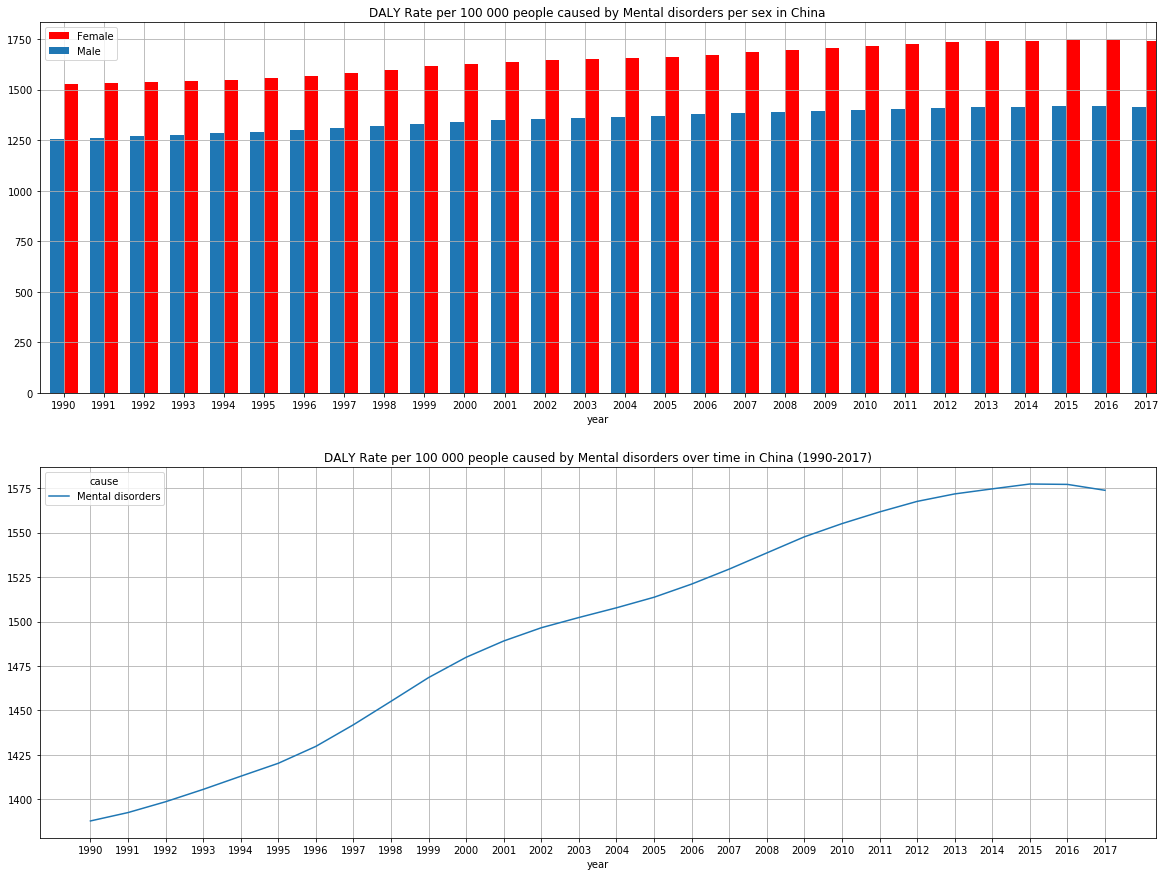

In [706]:
# Let's plot mental illness in total for China to see what it looks like
plot_DALY_per_sex_country(cause_name=Cause.LEVEL_1)

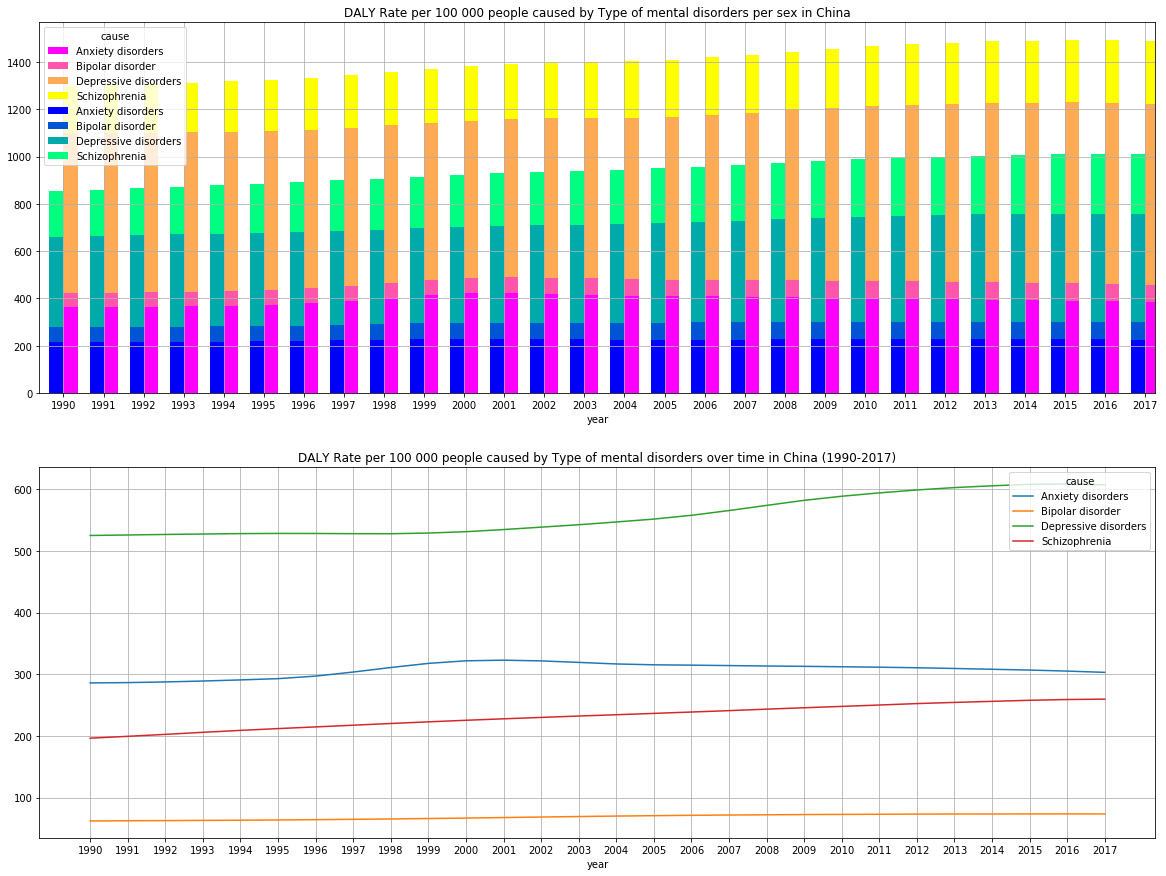

In [707]:
# Let's plot each mental illness separately for China
# Left colum: Male; Right column: Female
plot_DALY_per_sex_country()

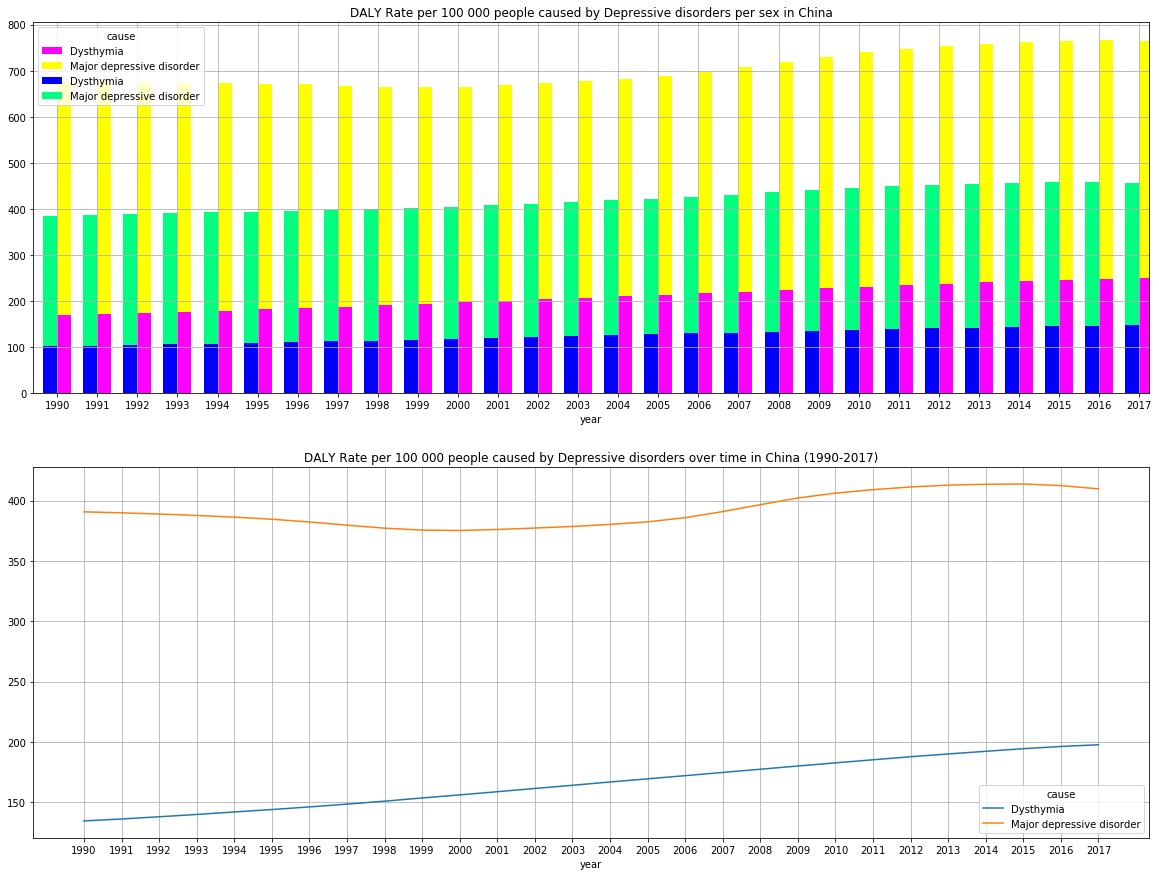

In [708]:
# Let's check for depression in particular in China
# Left colum: Male; Right column: Female
plot_DALY_per_sex_country(cause_name=Cause.DEPRESSION)

In [691]:
df_country = DALY_number_per_country[country]
df_country[(df_country.year == year) & (df_country.cause.isin(eating))]

['Major depressive disorder', 'Dysthymia']

In [684]:
# Let's check for different ages
def plot_DALY_per_age_country(country='China', start_year=2017, end_year=2017, cause_name=Cause.LEVEL_2, measure = Measure.NUMBER, stacked=True):
    """Plot DALY measure for chosen illness per age for a specific country"""
    # Choose measure
    if measure == Measure.NUMBER:
        df_country = DALY_number_per_country[country]
        measure_name = "number"
    elif measure == Measure.RATE:
        df_country = DALY_rate_per_country[country]
        measure_name = "Rate per 100 000 people"
    else:
        df_country = DALY_perc_per_country[country]
        measure_name = "percentage"
        
    # Choose cause
    if cause_name == Cause.LEVEL_1:
        cause = level_1
    elif cause_name == Cause.LEVEL_2:
        cause = level_2
    elif cause_name == Cause.DEPRESSION:
        cause = depression
    else:
        cause = eating
    
    # Set fixed variables for sex and age
    df_country = df_country[(df_country.age != 'All Ages') & (df_country.sex == 'Both')]
    
    # Find years
    years = np.linspace(start_year, end_year, end_year - start_year + 1).astype(int)
    years_dfs = []
    
    # Plot graph per years for each graph
    for year in years:
        years_dfs.append(df_country[(df_country.year == year) & (df_country.cause.isin(cause))].groupby(['age', 'cause'])['val'].sum().unstack())

    df_country_over_years = df_country[ (df_country.cause.isin(level_1))].groupby(['year', 'age'])['val'].sum().unstack()

    fig, axes = plt.subplots(figsize=(20, 10 * len(years) + 5), ncols=1, nrows=len(years) + 1)
    width = 0.5
    
    # Plot for each year
    for i, df in enumerate(years_dfs):
        df.plot.bar(stacked=stacked, ax=axes[i], grid=True, width=width, rot=0, legend=True, title="DAILY {} per age caused by {} in {} ({})".format(measure_name, cause_name.value, country, start_year + i))
    
    df_country_over_years.plot(ax=axes[len(years)], grid=True, title="DALY {} caused by {} over time in {} (1990-2017)".format(measure_name, cause_name.value, country))
    # Set manually xtick for each year
    axes[len(years)].xaxis.set_ticks(df_country.year.unique())
    # Put legend outside
    axes[len(years)].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

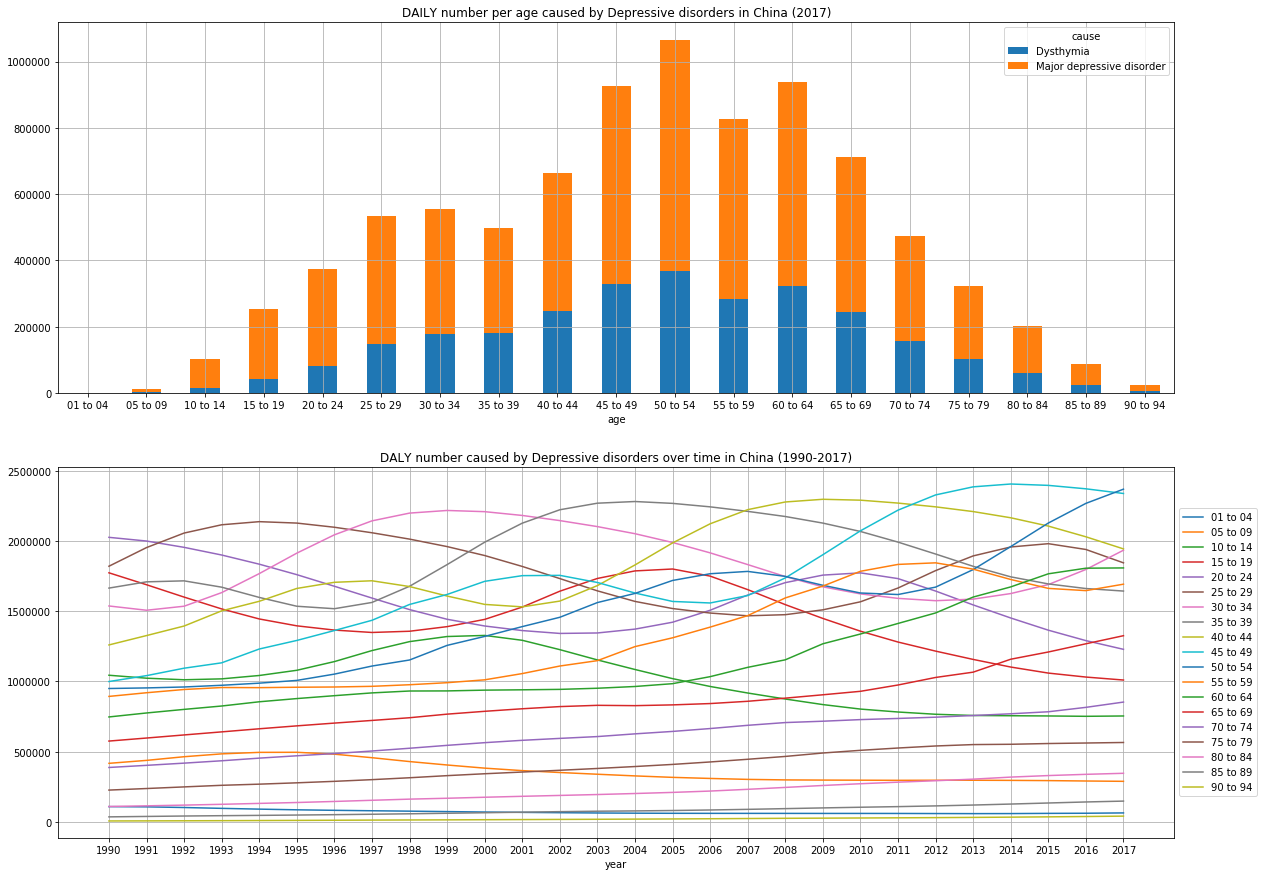

In [692]:
# Let's see the distribution DALY caused by all mental illness Globally over age in 2017
plot_DALY_per_age_country(country='China', cause_name=Cause.DEPRESSION)

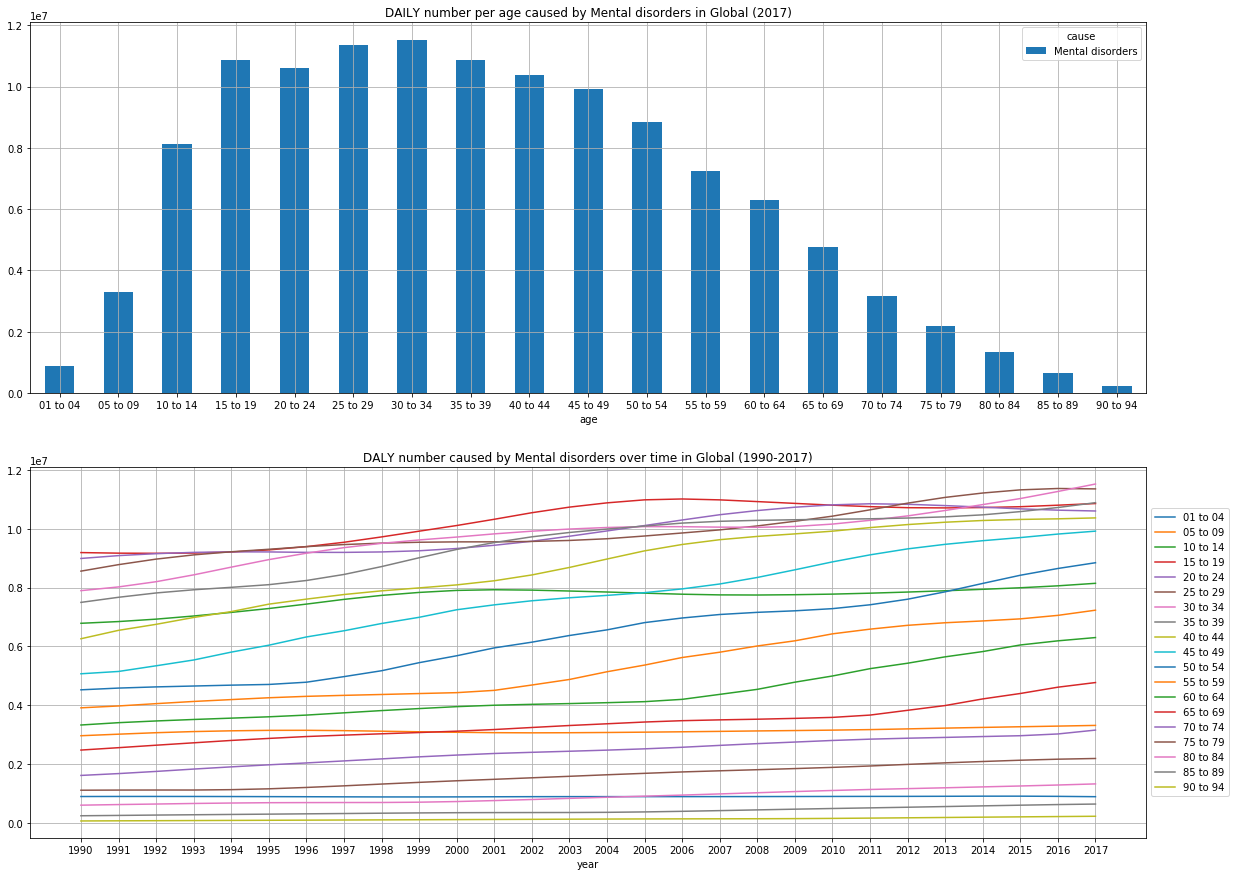

In [693]:
# Let's see the distribution DALY caused by all mental illness in China over age in 2017
plot_DALY_per_age_country(country='Global', cause_name=Cause.LEVEL_1)

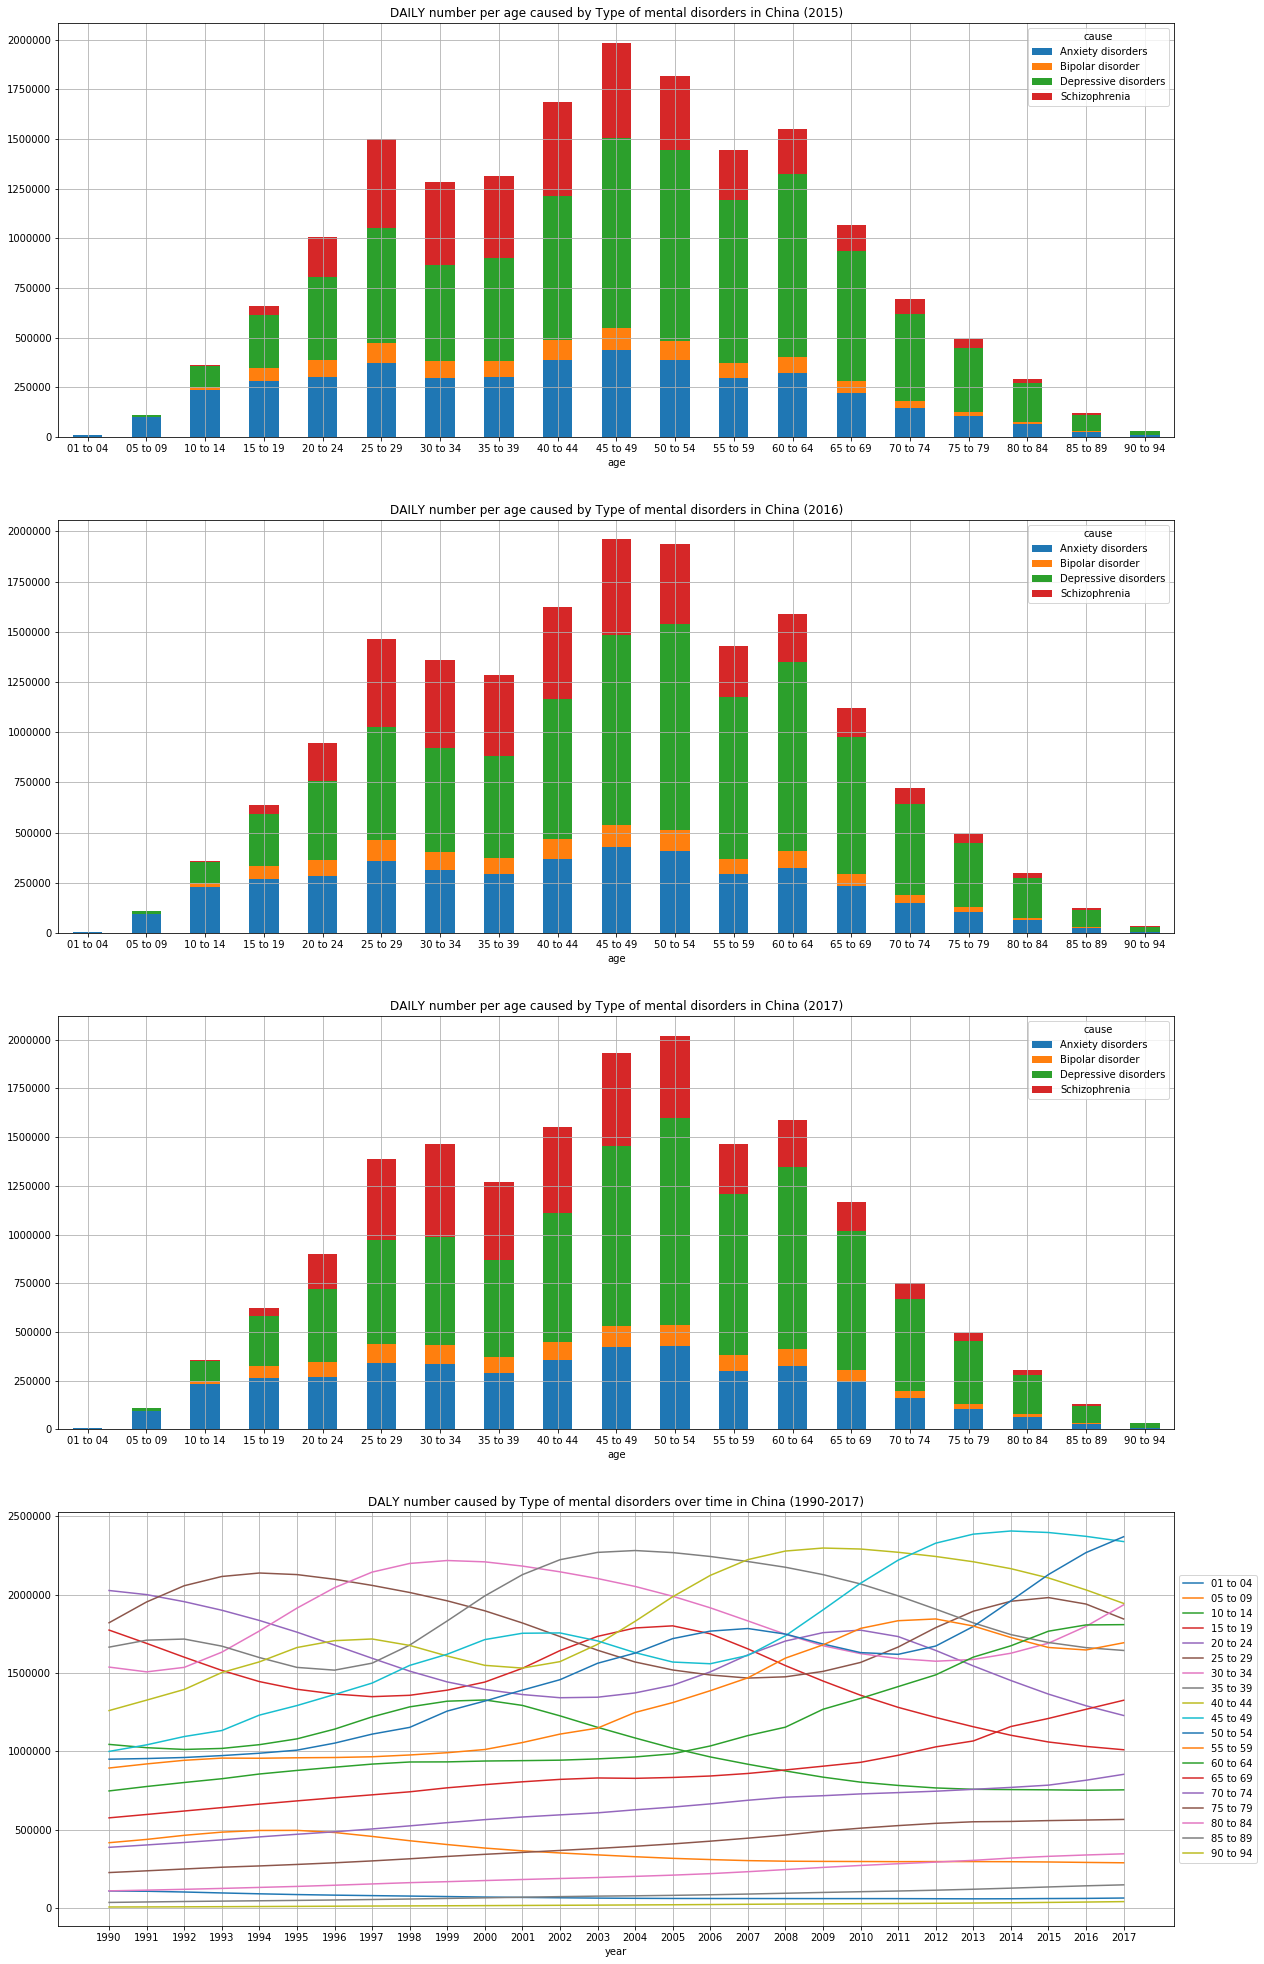

In [683]:
# Let's see the distribution of DALY numbers per mental illness per group of age from 2015 to 2017
# and how it changes over years (1990-2017)
plot_DALY_per_age_country(start_year=2015)

In [ ]:
df = DALY_number
global_DALY = df[(df.location == 'Global') & (df.sex == 'Both') & (df.age == 'All Ages')]
global_DALY.groupby(['year', 'cause']).plot(figsize=(10, 10))

In [123]:
# Split according to 'cause_name', 'year', 'location_name', 'age_name'
groupbys = YLL_number.groupby(['cause', 'year', 'location', 'age', 'sex'])
groups = groupbys.groups
year_grs = YLL_number.groupby('year').groups
mentaldisorder_grs = YLL_number.groupby('cause').groups
location_grs = YLL_number.groupby('location').groups
age_grs = YLL_number.groupby('age').groups

Let's see the mean distribution of the mental disorders (all comprised) geographically. First accross each continent.

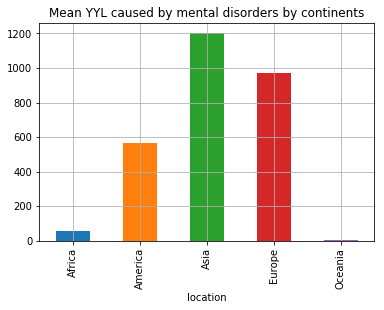

In [183]:
# Let's see how mental disorder affect people's life in each big continents
YLL_continents = YLL_number[YLL_number.location.isin(continents)]
YLL_continents_val = YLL_continents.groupby('location')['val'].mean().to_frame()
YLL_continents_val['Upper'] = YLL_continents.groupby('location')['upper'].mean()
YLL_continents_val['Lower'] = YLL_continents.groupby('location')['lower'].mean()
YLL_continents_val.val.plot.bar(title="Mean YYL caused by mental disorders by continents", grid=True)

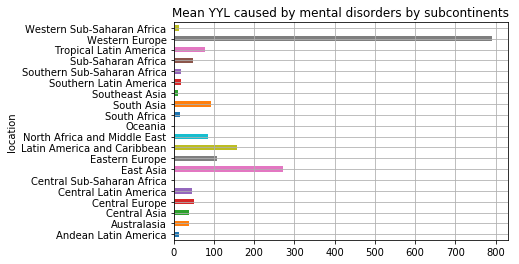

In [206]:
YLL_subcontinents = YLL_number[YLL_number.location.isin(subcontinents)]
YLL_subcontinents_val = YLL_subcontinents.groupby('location')['val'].mean().to_frame()
YLL_subcontinents_val['Upper'] = YLL_subcontinents.groupby('location')['upper'].mean()
YLL_subcontinents_val['Lower'] = YLL_subcontinents.groupby('location')['lower'].mean()
YLL_subcontinents_val.val.plot.barh(title="Mean YYL caused by mental disorders by subcontinents", grid=True)

In [191]:
# Let's check more closely by continent
asia = ['Southeast Asia', 'East Asia', 'South Asia', 'Central Asia']
oceania = ['Australasia', 'Oceania']
america = ['Central Latin America', 'Andean Latin America', 'Southern Latin America', 'Latin America and Caribbean',
             'Tropical Latin America']
europe = ['Western Europe', 'Central Europe', 'Eastern Europe']
africa = ['North Africa and Middle East', 'North Africa and Middle East', 
              'Sub-Saharan Africa', 'Central Sub-Saharan Africa', 'Southern Sub-Saharan Africa', 'South Africa',
             'Western Sub-Saharan Africa']

continents_list = [asia, oceania, america, europe, africa]

['Southeast Asia', 'East Asia', 'South Asia', 'Central Asia']
['Australasia', 'Oceania']
['Australasia', 'Oceania']
['Central Latin America', 'Andean Latin America', 'Southern Latin America', 'Latin America and Caribbean', 'Tropical Latin America']
['Central Latin America', 'Andean Latin America', 'Southern Latin America', 'Latin America and Caribbean', 'Tropical Latin America']
['Western Europe', 'Central Europe', 'Eastern Europe']


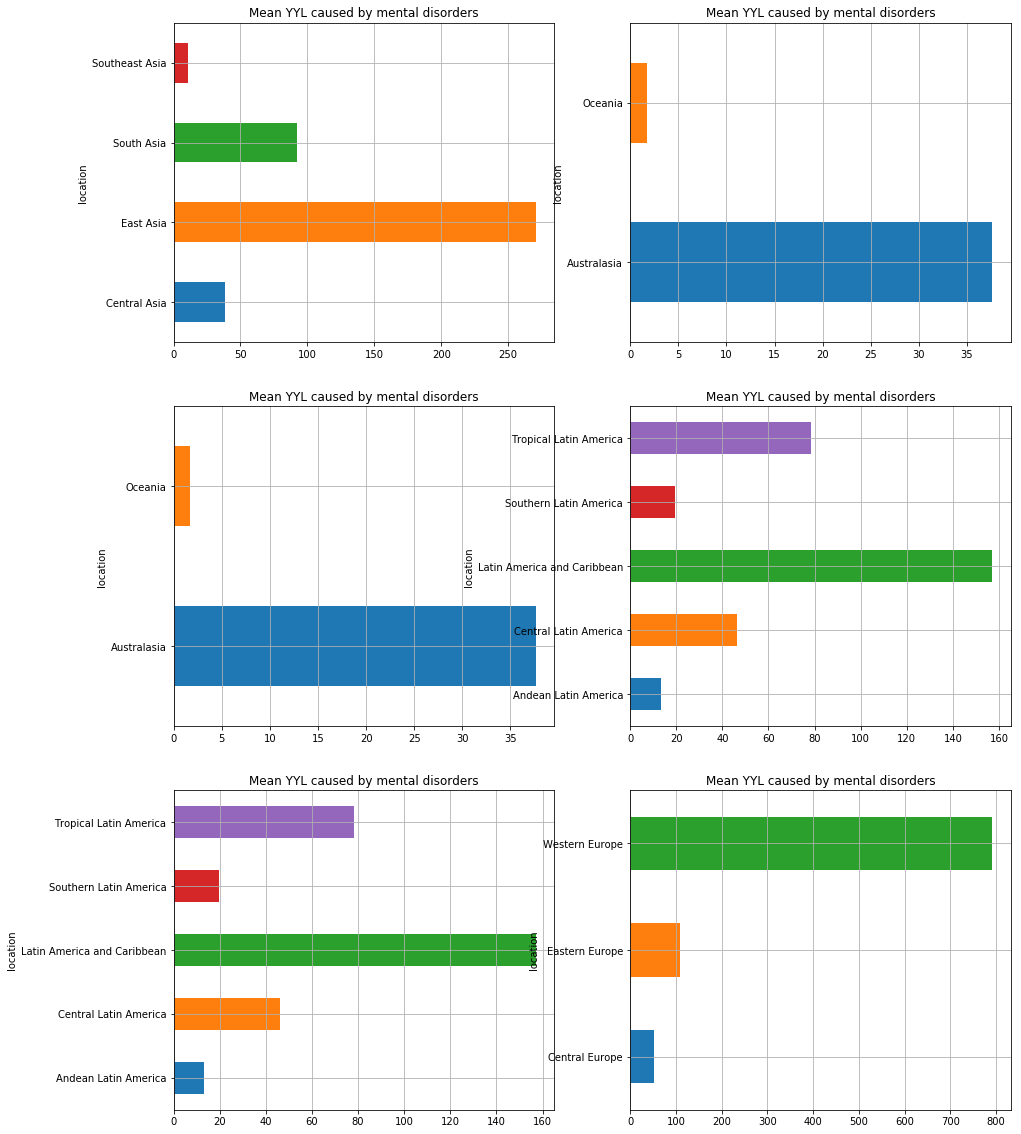

In [205]:
nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,20))

for row in range(nrows):
    for col in range(ncols):
        if row + col < len(continents_list):
            print(continents_list[row+col])
            YLL_df = YLL_number[YLL_number.location.isin(continents_list[row+col])]
            YLL_df_val = YLL_df.groupby('location')['val'].mean().to_frame()
            YLL_df_val.val.plot.barh(title="Mean YYL caused by mental disorders", grid=True, ax=axes[row, col])

We can see that Asia (East Asia) / EUROPE?? seems to be the continent most affected by mental disorders.

In [68]:
print("Locations: {}".format(location_grs.keys()))
# for value in sorted(location_grs.keys()):
#     print(value)

Locations: dict_keys(['Africa', 'African Region', 'America', 'Andean Latin America', 'Asia', 'Caribbean', 'Central Asia', 'Central Europe', 'Central Europe, Eastern Europe, and Central Asia', 'Central Latin America', 'Central Sub-Saharan Africa', 'Commonwealth', 'East Asia', 'Eastern Europe', 'Eastern Mediterranean Region', 'Eastern Sub-Saharan Africa', 'Europe', 'European Region', 'Four World Regions', 'Global', 'Indonesia', 'Japan', 'Latin America and Caribbean', 'Nordic Region', 'OECD Countries', 'Oceania', 'Region of the Americas', 'South Asia', 'South-East Asia Region', 'Southeast Asia', 'Southeast Asia, East Asia, and Oceania', 'Southern Latin America', 'Southern Sub-Saharan Africa', 'Sub-Saharan Africa', 'Tropical Latin America', 'United States', 'WHO region', 'Western Europe', 'Western Pacific Region', 'Western Sub-Saharan Africa'])
